In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, callbacks

In [2]:
(x_train , y_train) , (x_test , y_test) = tf.keras.datasets.fashion_mnist.load_data()

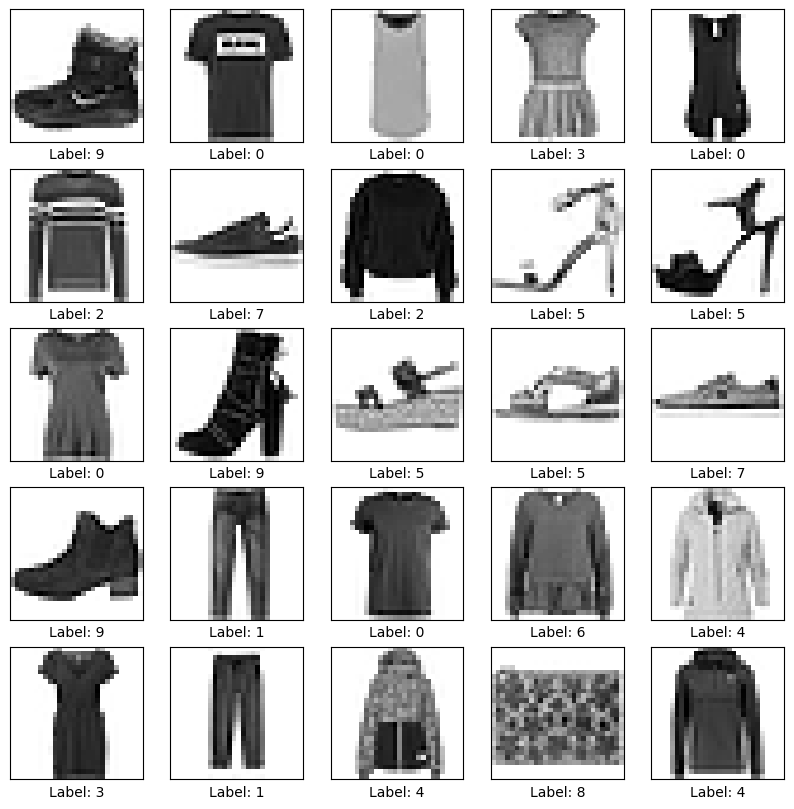

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(f'Label: {y_train[i]}')

In [9]:
x_train = x_train.astype('float32') / 255
x_test = x_train.astype('float32') / 255

In [10]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [11]:
data_augmentation = tf.keras.Sequential([layers.RandomRotation(0.1),
                                        layers.RandomZoom(0.1)])

In [15]:
model = models.Sequential([layers.Flatten(input_shape=(28,28)),
                          layers.Dense(512, activation='relu'),
                          layers.Dense(256, activation='relu'),
                          layers.Dense(128, activation='relu'),
                          layers.Dense(10, activation='softmax')])

In [16]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [17]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# TensorBoard - This allows you to monitor your training process by logging metrics (such as accuracy and loss) during training.
from tensorflow.keras.callbacks import TensorBoard 

# The time module is imported to create a unique folder name for storing the logs based on the current date and time.
import time  

In [24]:
# log_dir defines the directory where TensorBoard will save the logs.
# time.strftime('%Y%m%d-%H%M%S') generates a timestamp in the format YYYYMMDD-HHMMSS. 
#This ensures each run of model has its own unique log folder,so that logs of different training runs don’t overwrite each other. 
#Example: If today is October 3rd, 2024, at 10:30 AM, the log directory would look like: logs/fit/20241003-103000.
log_dir = f"logs/fit/{time.strftime('%Y%m%d - %H%M%S')}"
tensorboard_callbacks = TensorBoard(log_dir = log_dir, histogram_freq = 1)

In [25]:
history = model.fit(x_train, y_train, epochs = 20, batch_size = 70, validation_split = 0.2, callbacks=[tensorboard_callbacks])

Epoch 1/20
686/686 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.7682 - loss: 0.6506 - val_accuracy: 0.8506 - val_loss: 0.4122
Epoch 2/20
686/686 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.8623 - loss: 0.3731 - val_accuracy: 0.8610 - val_loss: 0.3743
Epoch 3/20
686/686 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.8777 - loss: 0.3321 - val_accuracy: 0.8629 - val_loss: 0.3848
Epoch 4/20
686/686 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.8845 - loss: 0.3096 - val_accuracy: 0.8778 - val_loss: 0.3452
Epoch 5/20
686/686 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.8920 - loss: 0.2887 - val_accuracy: 0.8835 - val_loss: 0.3207
Epoch 6/20
686/686 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9001 - loss: 0.2684 - val_accuracy: 0.8821 - val_loss: 0.3220
Epoch 7/20
686/686 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9009 - loss: 0.2624 - val_accuracy: 0.8854 - val_loss: 0.3279
Epoch 8/20
686/686 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9064 - loss: 0.2443 - val_acc

In [29]:
#HDF5 is data storage format designed for storing and organizing large amounts of numerical data, making it ideal for ML models.
model.save('fashion_mnist_model.h5')

In [30]:
# Load the model
new_model = models.load_model('fashion_mnist_model.h5')

In [31]:
# Verify the architecture
new_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 567,436 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [33]:
original_params = model.count_params()
loaded_params = new_model.count_params()

print(f"Original model parameters: {original_params}")
print(f"Loaded model parameters: {loaded_params}")

# Ensure the loaded model is identical to the original one
assert original_params == loaded_params, "Model parameters do not match!"

Original model parameters: 567434
Loaded model parameters: 567434
